<a href="https://colab.research.google.com/github/guimullerfer/seazone_desafio/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e leitura da base dados

In [169]:
# Importando bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
from datetime import datetime #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plot de gráficos
import seaborn as sns #plot de gráficos
from collections import Counter #contador de elementos em lista
from sklearn.preprocessing import OneHotEncoder #técnica de processamento de dados para machine learning
import re #tratamento de expressões regulares.
from sklearn.ensemble import RandomForestClassifier #modelo para machine learning

In [140]:
df_details = pd.read_csv("desafio_details.csv")
df_priceav = pd.read_csv("desafio_priceav.csv")

# Analisando rápida

In [141]:
df_details.head(3)

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0


In [142]:
df_priceav.head(3)

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0


In [143]:
df_details.isnull().sum()

Unnamed: 0                0
airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64

In [144]:
df_priceav.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
airbnb_listing_id    0
booked_on            0
date                 0
price_string         0
occupied             0
dtype: int64

# Analisando Outliers

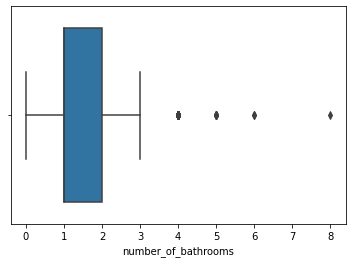

In [145]:
sns.boxplot(x=df_details['number_of_bathrooms']) # Possuí valores discrepantes, mas compreensível.

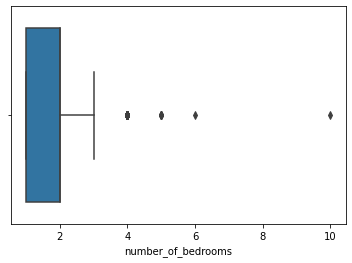

In [146]:
sns.boxplot(x=df_details['number_of_bedrooms']) # Possuí valores discrepantes, mas compreensível.

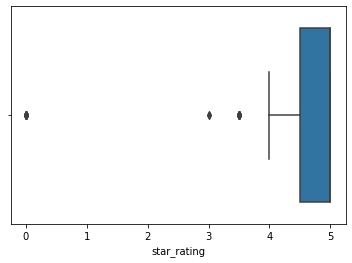

In [147]:
sns.boxplot(x=df_details['star_rating']) # Possuí valores discrepantes, mas compreensível.

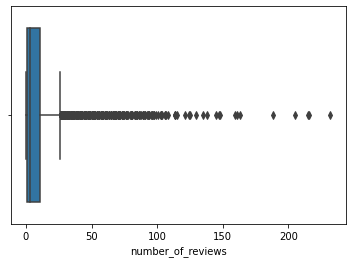

In [148]:
sns.boxplot(x=df_details['number_of_reviews']) # Possuí valores discrepantes, mas compreensível.

In [149]:
ano = []
for i in df_priceav[df_priceav.booked_on != 'blank'].booked_on.values:
  ano.append(int(i.split("-")[0]))
print(Counter(ano)) 
# Existe três linhas referentes a 2000.

Counter({2020: 89169, 2021: 75779, 2000: 3})


In [150]:
ano = []
for i in df_priceav[df_priceav.booked_on != 'blank'].date.values:
  ano.append(int(i.split("-")[0]))
print(Counter(ano)) 
# Não existe nenhuma linha referente ao ano 2000. Irei analisar as linhas que booked_on possui ano 2000

Counter({2021: 101827, 2020: 63124})


Todos as colunas, com exceção da Booked_on, apresentaram valores compreensíveis, não necessitando nenhum tratamento. Existe três linhas na coluna Booked_on referentes ao ano 2000, no qual não faz sentido. Para esses casos, eu irei considerar o valor de Booked_on igual ao valor de Date. Como irei utilizar esses valores apenas na questão 4, irei realizar o tratamento depois.

# 1. Ordene os bairros em ordem crescente de número de listings

In [151]:
# Primeiro irei criar um dataframe onde irei contar e ordenar o número de listings por bairro.
df_order_by_listings = df_details.groupby(['suburb']).count().sort_values(by='airbnb_listing_id')
# Após isso, irei armazenar:
n_listings = df_order_by_listings.iloc[:,0].values # O número de listings de cada bairro.
nome_bairro = df_order_by_listings.iloc[:,0].index.values # O nome de cada bairro

In [152]:
for x,y in zip(nome_bairro, n_listings):
  print(x + ' possui ' + str(y) + ' listings')

Centro possui 278 listings
Lagoa da Conceição possui 309 listings
Jurerê possui 539 listings
Canasvieiras possui 1177 listings
Ingleses possui 2388 listings


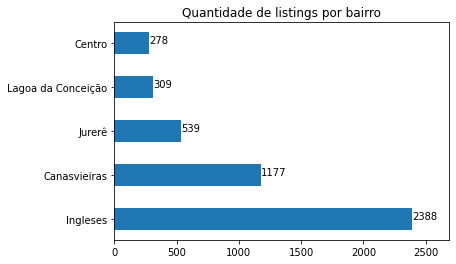

In [153]:
fig, ax = plt.subplots()
ax.set(title='Quantidade de listings por bairro')
ax.barh(nome_bairro[::-1], n_listings[::-1], height=0.5) # Usei [::-1] para visualizar em ordem crescente no gráfico
for index, value in enumerate(n_listings[::-1]):
  ax.text(value, index, str(value))
ax.set_xbound(0, n_listings[-1]+300)

# 2. Ordene os bairros em ordem crescente de faturamento médio dos listings

In [154]:
# Só faz sentido analisar a média de faturamente dos dias que foram alugados.
# Para isso, vou criar um DataFrame contendo só esses dias:
df_booked_on = df_priceav[df_priceav.booked_on != 'blank']

# Armazenando os valores referentes a ID e faturamente médio por estabelecimento
id_listing = df_booked_on.groupby(['airbnb_listing_id']).mean().loc[:,'price_string'].index.values
faturamento_medio = df_booked_on.groupby(['airbnb_listing_id']).mean().loc[:,'price_string'].values

# Substituindo os valores de ID por bairro
suburb = []
for i in id_listing:
  suburb.append(df_details.loc[df_details['airbnb_listing_id'] == i].loc[:,'suburb'].values[0])

# Criando um Dataframe com Bairro e armazendo o faturamento médio por estabelecimento
df_new = pd.DataFrame({'bairro':suburb, 'faturamento_medio':faturamento_medio})

# Calculando o faturamento médio por bairro e arredondo para 2 digitos decimais
df_aux = df_new.groupby(by=df_new['bairro']).mean().sort_values(by='faturamento_medio', ascending=True)
bairro = df_aux.index.values
faturamento_medio_por_bairro = np.round(df_aux.values,2).ravel()

In [155]:
for x,y in zip(bairro, faturamento_medio_por_bairro):
  print(x + ' possui faturamente médio de R$ ' + str(y))

Centro possui faturamente médio de R$ 244.14
Lagoa da Conceição possui faturamente médio de R$ 264.14
Canasvieiras possui faturamente médio de R$ 306.96
Ingleses possui faturamente médio de R$ 373.06
Jurerê possui faturamente médio de R$ 436.48


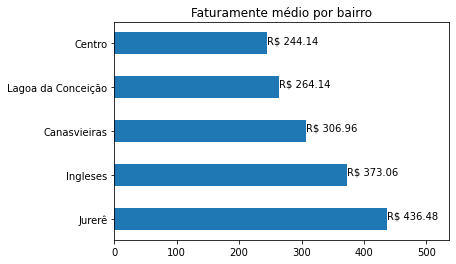

In [156]:
fig, ax = plt.subplots()
ax.set(title='Faturamente médio por bairro')
ax.barh(bairro[::-1], faturamento_medio_por_bairro[::-1], height=0.5) # Usei [::-1] para visualizar em ordem crescente no gráfico
for index, value in enumerate(faturamento_medio_por_bairro[::-1]):
  ax.text(value, index, 'R$ ' + str(value))
ax.set_xbound(0, faturamento_medio_por_bairro[-1]+100)

# 3. Existem correlações entre as características de um anúncio e seu faturamento? 
a. Quais? Explique

In [157]:
# Armazenando os valores referentes a ID e faturamente total por estabelecimento
id = df_booked_on.groupby(['airbnb_listing_id']).sum().loc[:,'price_string'].index.values
faturamento_total = df_booked_on.groupby(['airbnb_listing_id']).sum().loc[:,'price_string'].values

# Criando um Dataframe com ID e armazendo o faturamento total por estabelecimento
df_new = pd.DataFrame({'airbnb_listing_id':id, 'faturamento_total':faturamento_total})

# Realizando um merge e armazendo num Dataframe
df_merge = pd.merge(df_details,df_new,how='inner', on=['airbnb_listing_id'])

# Excluindo colunas desnecessárias para análise
df_merge = df_merge.drop(columns=['Unnamed: 0', 'airbnb_listing_id', ])

# Transformando bairro para OneHotEncoder
suburb_encoder = OneHotEncoder()
suburb_reshape = np.array(df_merge['suburb']).reshape(-1, 1)
suburb_values = suburb_encoder.fit_transform(suburb_reshape)
df_merge.drop('suburb', axis=1, inplace=True)

In [158]:
# Analisando o inverso do OneHotEncoder para criar as novas colunas para bairro
print(suburb_values.toarray()[:10])
print(suburb_encoder.inverse_transform(suburb_values)[:10])
# 1 - Canasvieiras / 2 - Centro / 3 - Ingleses / 4 - Jurerê / 5 - Lagoa da Conceição
df_suburb = pd.DataFrame(suburb_values.toarray(), columns=['is_canasvieiras', 'is_centro', 'is_ingleses', 'is_jurere', 'is_lagoa_da_conceicao'])
df_merge = pd.concat([df_merge, df_suburb], axis=1)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[['Jurerê']
 ['Canasvieiras']
 ['Ingleses']
 ['Canasvieiras']
 ['Ingleses']
 ['Ingleses']
 ['Canasvieiras']
 ['Lagoa da Conceição']
 ['Ingleses']
 ['Ingleses']]


In [159]:
# Irei "contar" a aparição das palavras na coluna refente ao nome do anuncio para tirar algumas informações.
info = []
for i in df_merge['ad_name']: 
  for j in i.split(" "):
    info.append(re.sub('[^A-Za-z0-9]+', '', j.lower()))
# Descomente a linha abaixo para verificar a quantidade de aparição de cada elemento 
#print(Counter(info))
# Podemos ver que conseguimos tirar algumas Features interessantes pelo nome do anuncio:
# menciona_praia: praia
# menciona_apartamento: apartamento, apto, ap
# menciona_mar: mar
# menciona_vista: vista
# menciona_cobertura: cobertura
# menciona_piscina: piscina
# menciona_lagoa: lagoa
# menciona_completo: completo

In [160]:
# Irei adicionar essas features ao DataFrame, sendo 1 - menciona e 0 - não menciona
menciona = np.zeros((len(df_merge['ad_name']), 8))
k = 0
for i in df_merge['ad_name']: 
  for j in i.split(" "):
    texto = re.sub('[^A-Za-z0-9]+', '', j.lower())
    if (texto == 'praia'):
      menciona[k,0] = 1
    if (texto == 'apartamento' or texto == 'apto' or texto == 'ap'):
      menciona[k,1] = 1
    if (texto == 'mar'):
      menciona[k,2] = 1
    if (texto == 'vista'):
      menciona[k,3] = 1
    if (texto == 'cobertura'):
      menciona[k,4] = 1
    if (texto == 'piscina'):
      menciona[k,5] = 1
    if (texto == 'lagoa'):
      menciona[k,6] = 1
    if (texto == 'completo'):
      menciona[k,7] = 1
  k += 1
df_merge.drop('ad_name', axis=1, inplace=True)
df_menciona = pd.DataFrame(menciona, columns=['menciona_praia', 'menciona_apartamento', 'menciona_mar', 'menciona_vista', 'menciona_cobertura', 'menciona_piscina', 'menciona_lagoa', 'menciona_completo'])
df_merge = pd.concat([df_merge, df_menciona], axis=1)

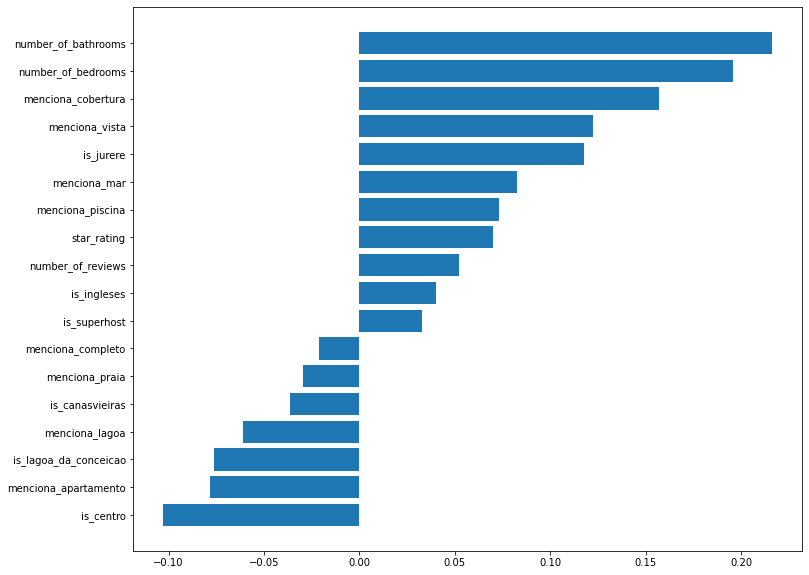

In [161]:
# Pela correlação de Pearson, podemos ver que há um aumento linear do faturamento total conforme aumenta, principalmente:
# Número de banheiros, número de quartos, se menciona cobertura, se menciona vista e se a localização é jurere.
plt.figure(figsize=(12,10))
cor = df_merge.corr(method='pearson')
sort = cor.loc['faturamento_total'].values.argsort()
plt.barh(cor.loc['faturamento_total'].index.values[sort][:-1], cor.loc['faturamento_total'].values[sort][:-1])
plt.show()

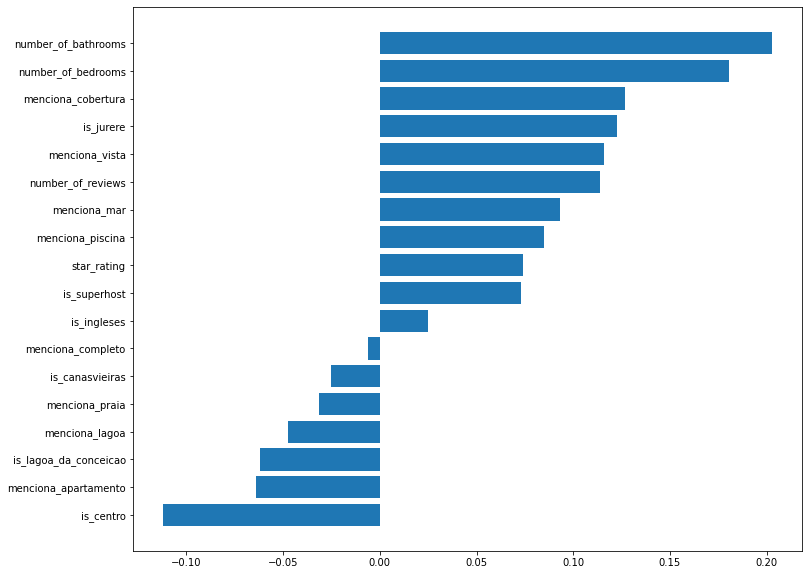

In [162]:
# Pela correlação de Spearman, não muita modificação na correlação, mas podemos ver um aumento na correlação com o número de reviews.
# Isso indica que o faturamento aumenta não-linearmente com o número de reviews.
plt.figure(figsize=(12,10))
cor = df_merge.corr(method='spearman')
sort = cor.loc['faturamento_total'].values.argsort()
plt.barh(cor.loc['faturamento_total'].index.values[sort][:-1], cor.loc['faturamento_total'].values[sort][:-1])
plt.show()

In [163]:
# Irei realizar a técnica de RandomForest para realizar a técnica de Feature Importance

df_dropna = df_merge.dropna()
x = df_dropna.drop('faturamento_total', 1)
y = df_dropna.loc[:,'faturamento_total'].values

forest = RandomForestClassifier(n_estimators=42, random_state=0)
forest.fit(x, y)
print("Acurácia de: ",forest.score(x, y))

Acurácia de:  0.8640776699029126


<BarContainer object of 18 artists>

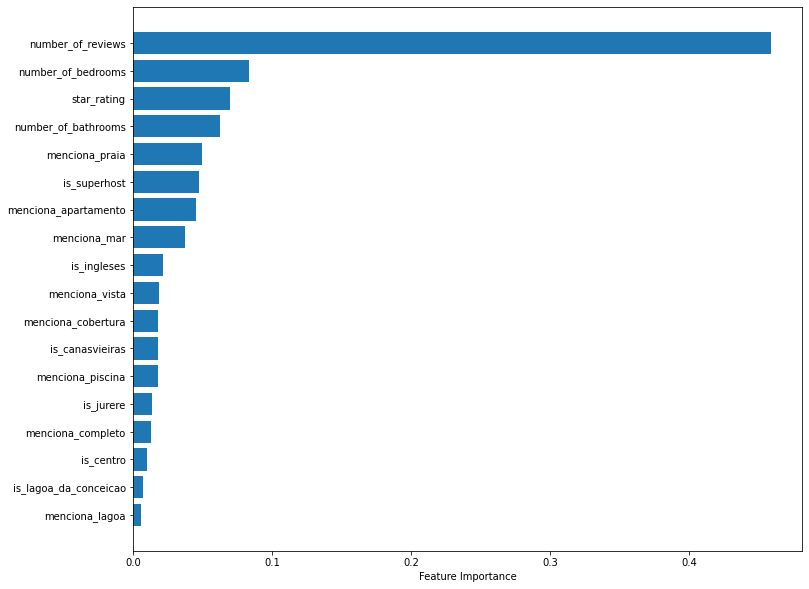

In [164]:
sort = forest.feature_importances_.argsort()
plt.figure(figsize=(12,10))
plt.xlabel("Feature Importance")
plt.barh(x.columns[sort], forest.feature_importances_[sort])
# Podemos notar que o número de reviews é de extrema importância para o faturamento total. Ainda podemos notar que, diferente das correlações anteriores...
# essa técnica indica que a feature "star_rating" é importante no faturamento total.

Assim, podemos afirmar que as características mais importantes para um maior faturamente está associado com a "popularidade" do anuncio (número de reviews e star_rating), e com a quantidade de quartos/banheiros. Além disso, mencionar cobertura/vista no anuncio ou estar localizado em jurerê aumentam o faturamento. 

# 4. Qual a antecedência média das reservas?
a. Esse número é maior ou menor para finais de semana?


In [170]:
data_ocupação = df_booked_on.date.values 
data_alugada = df_booked_on.booked_on.values
diferenca_dias = []
diferenca_dias_final_de_semana = []
for x,y in zip(data_ocupação, data_alugada):
  if (datetime.fromisoformat(y).year != 2000): # Excluindo os três outliers
    dias = (datetime.fromisoformat(x) - datetime.fromisoformat(y)).days
  else:
    dias = 0  
  diferenca_dias.append(dias)
  if (datetime.fromisoformat(x).weekday() > 4): # 4 = Sexta-feira
    diferenca_dias_final_de_semana.append(dias)

In [171]:
print("Média todos os dias: ", np.mean(diferenca_dias))
print("Desvio padrão todos os dias: ", np.std(diferenca_dias))
print("Média final de semana: ", np.mean(diferenca_dias_final_de_semana))
print("Desvio padrão final de semana: ", np.std(diferenca_dias_final_de_semana))

Média todos os dias:  32.21282077707925
Desvio padrão todos os dias:  63.8261363266891
Média final de semana:  32.06244456986213
Desvio padrão final de semana:  62.934483591428865


Text(0.5, 1.0, 'Antecedência das reservas')

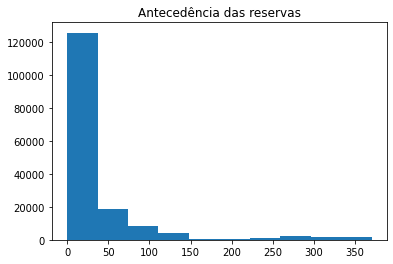

In [172]:
plt.hist(diferenca_dias)
plt.title('Antecedência das reservas')

Text(0.5, 1.0, 'Antecedência das reservas do final de semana')

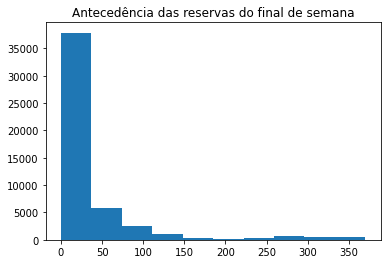

In [173]:
plt.hist(diferenca_dias_final_de_semana)
plt.title('Antecedência das reservas do final de semana')

A média de antecência das reservas é aproximadamente 32 dias. No final de semana, essa média diminui um pouco, mas nada significativo.